<a href="https://colab.research.google.com/github/BSsangani/Diamonds-prediction/blob/main/Diamonds_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# connect google drive

from google.colab import drive
drive.mount('/gdrive')

%cd '/gdrive/MyDrive/DiamondsPrediction'


Mounted at /gdrive
/gdrive/MyDrive/DiamondsPrediction


In [23]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [35]:
#load dataset

df = pd.read_csv('diamonds.csv')
df.head(20)

,no.,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


#**Data preprocessing**

In [25]:

df.shape


(53940, 11)

In [26]:
df.columns

Index(['no.', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

In [28]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   no.      53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


,no.,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [27]:
df.cut.value_counts()


Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [29]:
df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [30]:
df.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [31]:
df.head(20)

,no.,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


#**Exploratory Data Analysis**

<Axes: xlabel='depth', ylabel='Count'>

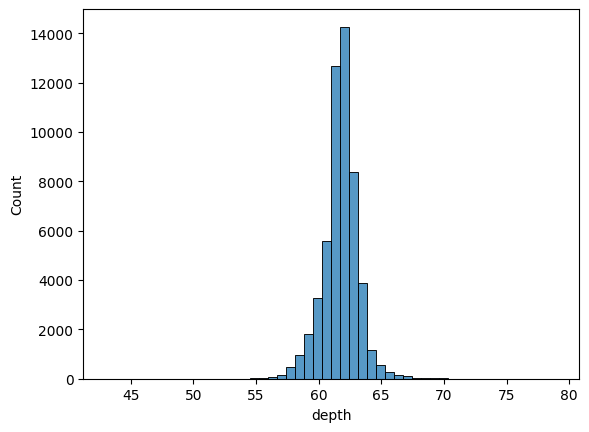

In [ ]:
sns.histplot(df['depth'],bins = 50)

<Axes: xlabel='price', ylabel='Count'>

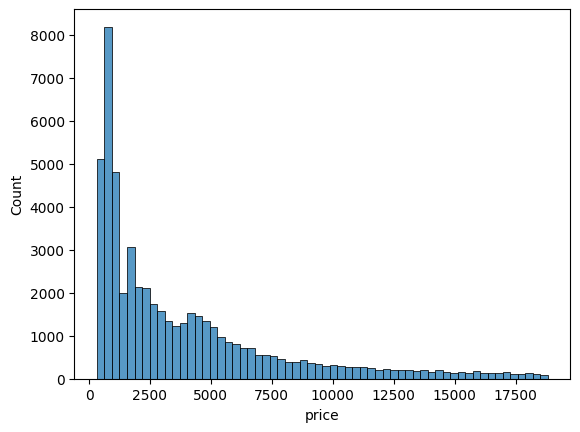

In [ ]:
sns.histplot(df['price'],bins = 60)

<Axes: xlabel='carat', ylabel='Count'>

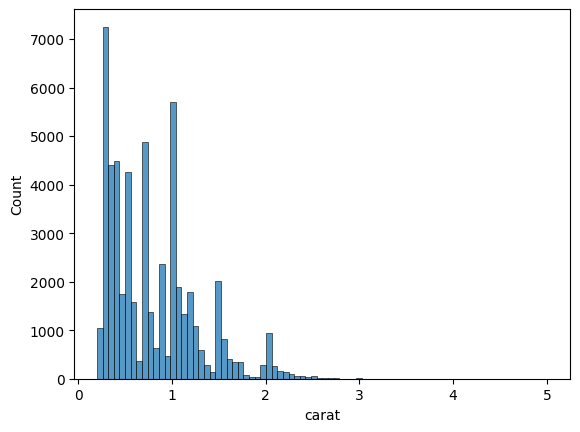

In [ ]:
sns.histplot(df['carat'],bins = 80)

Most of the diamonds are less then 1 carat in weight

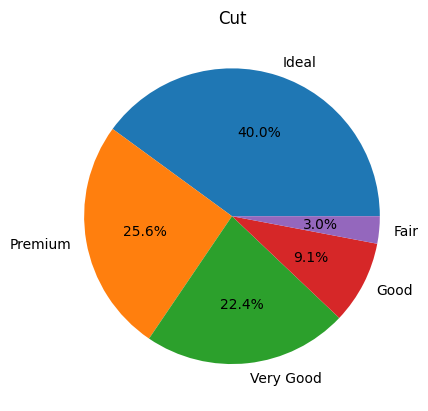

In [ ]:

plt.pie(df.cut.value_counts(),labels = df.cut.value_counts().index,autopct='%1.1f%%')
plt.title('Cut')
plt.show()


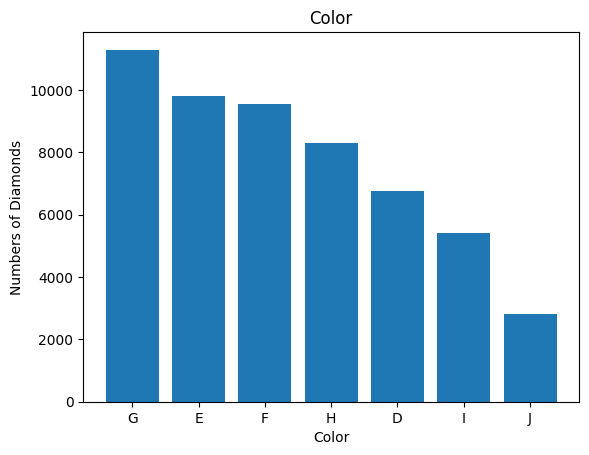

In [ ]:

plt.bar(df.color.value_counts().index,df.color.value_counts())
plt.xlabel('Color')
plt.ylabel('Numbers of Diamonds')
plt.show()


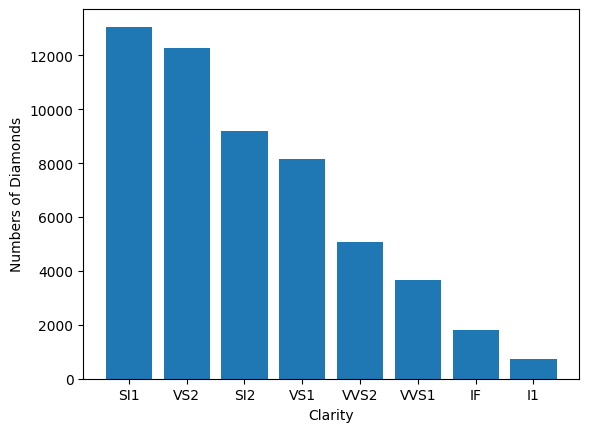

In [ ]:
plt.bar(df.clarity.value_counts().index,df.clarity.value_counts())
plt.xlabel('Clarity')
plt.ylabel('Numbers of Diamonds')
plt.show()


<Axes: xlabel='table', ylabel='Count'>

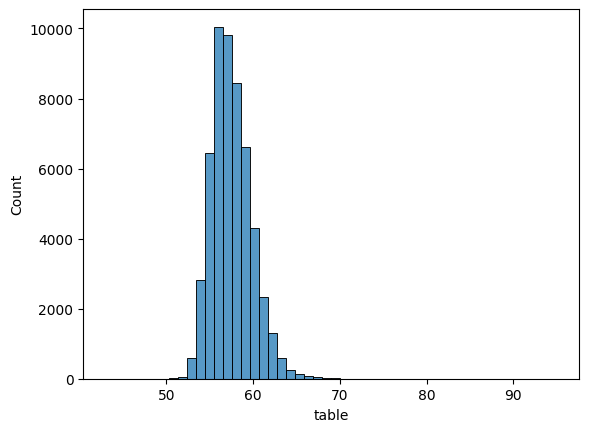

In [ ]:
# prompt: histplot

sns.histplot(df['table'],bins = 50)


#**Comparing Diamond's feature with price**

<Axes: xlabel='cut', ylabel='price'>

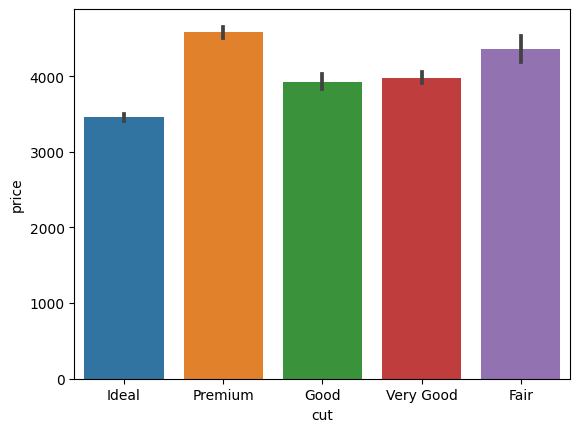

In [ ]:
# barplot

sns.barplot(x = df['cut'], y = df['price'])


<Axes: xlabel='color', ylabel='price'>

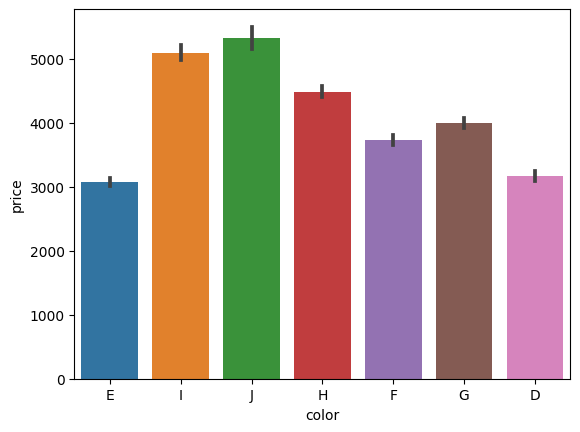

In [6]:
sns.barplot(x = df['color'], y = df['price'])


<Axes: xlabel='clarity', ylabel='price'>

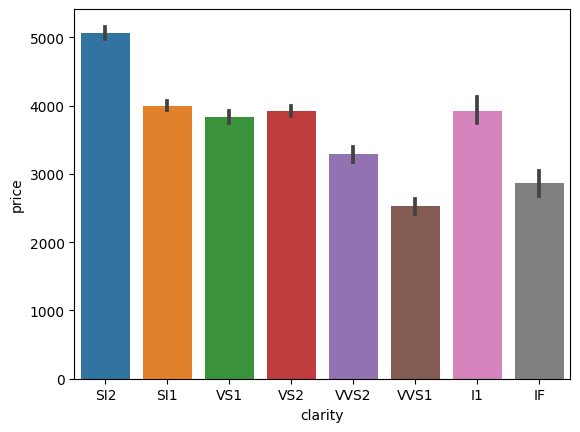

In [7]:
sns.barplot(x = df['clarity'], y = df['price'])

J color and I1 clarity are worst featiures for a diamond, however when the data is plotted on bar graph, it is seen that the price of diamonds with J color and I1 clarity is higher than the price of diamonds with D color and IF clarity, which is opposite to what I expected.

#**Data Preprocessing 2**

In [36]:
#changing categorical variable to numerical variable

df['cut'].value_counts()
df['cut'] = df['cut'].map({'Fair':1, 'Good':2, 'Very Good':3, 'Ideal':4, 'Excellent':5})
df['cut'].value_counts()
df['color'].value_counts()
df['color'] = df['color'].map({'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7})
df['color'].value_counts()
df['clarity'].value_counts()
df['clarity'] = df['clarity'].map({'IF':8, 'VVS1':7, 'VVS2':6, 'VS1':5, 'VS2':4, 'SI1':3, 'SI2':2, 'I1':1})
df['clarity'].value_counts()


3    13065
4    12258
2     9194
5     8171
6     5066
7     3655
8     1790
1      741
Name: clarity, dtype: int64

In [37]:
#coorelation matrix
df.corr()

,no.,carat,cut,color,clarity,depth,table,price,x,y,z
no.,1.000000,-0.377983,0.109533,-0.095098,0.208598,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,-0.173719,0.291437,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,0.109533,-0.173719,1.000000,-0.028771,0.226250,-0.270321,-0.490167,-0.066367,-0.160674,-0.153952,-0.187319
color,-0.095098,0.291437,-0.028771,1.000000,0.025631,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227
clarity,0.208598,-0.352841,0.226250,0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952
depth,-0.034800,0.028224,-0.270321,0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.490167,0.026465,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.066367,0.172511,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.160674,0.270287,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.153952,0.263584,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006


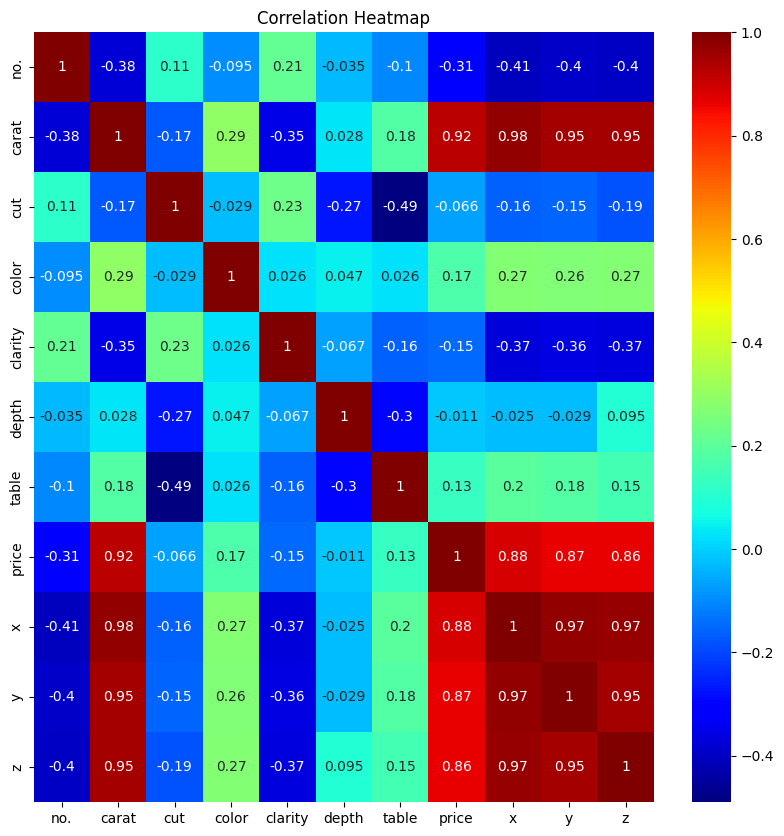

In [41]:
#plotting the correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='jet')
plt.title('Correlation Heatmap')
plt.show()